In [1]:
# import the library
%matplotlib inline

import os
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

sns.set_style('whitegrid')

In [2]:
# change directory to load data

os.chdir('C:/Users/trinh/Desktop/CEBD1260/Deliverables/Week2/Stocks')
os.listdir()[:5]

stocks=[]
csvs=[x for x in os.listdir() if x.endswith('.txt')]
csvs=[x for x in csvs if os.path.getsize(x)>0]
for csv in csvs:
    df=pd.read_csv(csv)
    df['ticker']=csv.replace('txt','')
    stocks.append(df)
stocks=pd.concat(stocks,ignore_index=True)
stocks.reset_index(inplace=True,drop=True)

In [3]:
# look at the format of datasets
print(stocks.describe())

#look at categorical variables
categorical=stocks.dtypes[stocks.dtypes=='object'].index
print(categorical)
stocks[categorical].describe()

               Open          High           Low         Close        Volume  \
count  1.488766e+07  1.488766e+07  1.488766e+07  1.488766e+07  1.488766e+07   
mean   3.038538e+04  3.121247e+04  2.936176e+04  3.024522e+04  1.585730e+06   
std    4.202501e+06  4.323486e+06  4.046981e+06  4.180590e+06  7.635187e+06   
min    0.000000e+00  4.000000e-03 -1.000000e+00  3.700000e-03  0.000000e+00   
25%    7.750000e+00  7.884000e+00  7.610000e+00  7.750000e+00  3.280000e+04   
50%    1.568000e+01  1.591900e+01  1.543100e+01  1.568000e+01  1.922660e+05   
75%    2.890000e+01  2.927900e+01  2.850000e+01  2.889990e+01  8.917860e+05   
max    1.423713e+09  1.442049e+09  1.362118e+09  1.437986e+09  2.423735e+09   

          OpenInt  
count  14887665.0  
mean          0.0  
std           0.0  
min           0.0  
25%           0.0  
50%           0.0  
75%           0.0  
max           0.0  
Index(['Date', 'ticker'], dtype='object')


,Date,ticker
count,14887665,14887665
unique,14084,7163
top,2017-11-07,ibm.us.
freq,6786,14059


In [4]:
# create new variables

stocks['change']=stocks['Close']-stocks['Open']
stocks['plevel']=(stocks['Close']+stocks['Open'])/2
stocks['spread']=stocks['High']-stocks['Low']

# print(stocks)

x_columns=['Volume','change','plevel','spread','ticker']

cluster=stocks.ix[:,x_columns]

cluster_mean=stocks.groupby(by='ticker').mean().ix[1:,]
cluster_std=stocks.groupby(by='ticker').std().ix[1:,]

print('mean',cluster_mean)
print('std_dev',cluster_std)
print(cluster.describe())

C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


mean                  Open        High         Low       Close        Volume  \
ticker                                                                    
a.us.       27.856296   28.270442   27.452486   27.871357  3.993503e+06   
aa.us.      24.419762   24.751516   24.056557   24.406203  3.337757e+06   
aaap.us.    37.229466   38.032705   36.466674   37.342337  1.499889e+05   
aaba.us.    25.401708   25.862379   24.925755   25.388213  2.321796e+07   
aac.us.     19.510399   20.065225   18.933637   19.478599  2.204412e+05   
aal.us.     41.150250   41.751690   40.537996   41.150520  1.004541e+07   
aamc.us.   275.232759  283.057715  267.766011  276.034721  1.764443e+04   
aame.us.     2.799858    2.854107    2.740064    2.807845  6.715761e+03   
aan.us.     23.178208   23.497556   22.851696   23.182218  7.139724e+05   
aaoi.us.    24.617401   25.289652   23.931701   24.626871  7.940869e+05   
aaon.us.    12.534327   12.722679   12.347933   12.544577  2.042583e+05   
aap.us.     79.51192

             Volume        change        plevel        spread
count  1.488766e+07  1.488766e+07  1.488766e+07  1.488766e+07
mean   1.585730e+06 -1.401639e+02  3.031530e+04  1.850707e+03
std    7.635187e+06  1.951235e+05  4.190424e+06  3.094747e+05
min    0.000000e+00 -2.356202e+08  2.250000e-03 -9.894400e+01
25%    3.280000e+04 -1.300000e-01  7.750000e+00  1.460000e-01
50%    1.922660e+05  0.000000e+00  1.568000e+01  3.560000e-01
75%    8.917860e+05  1.300000e-01  2.889750e+01  7.630000e-01
max    2.423735e+09  1.124302e+08  1.410702e+09  2.383651e+08


C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


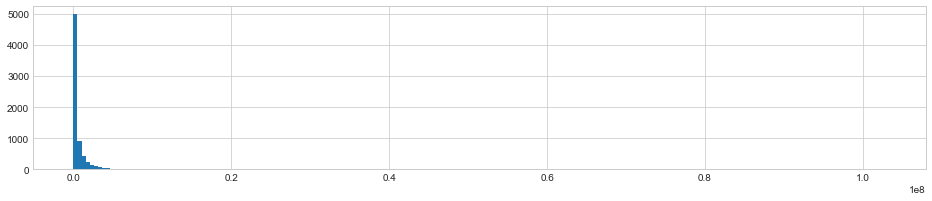

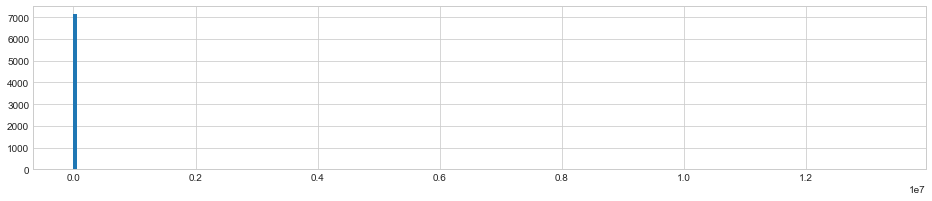

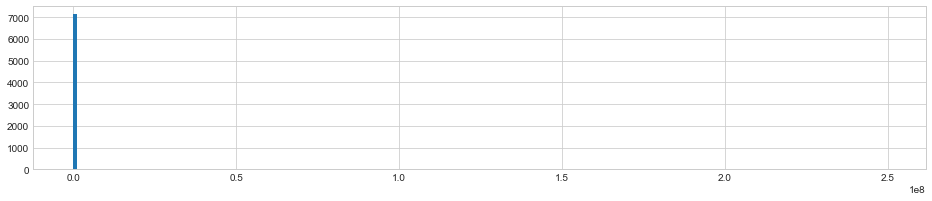

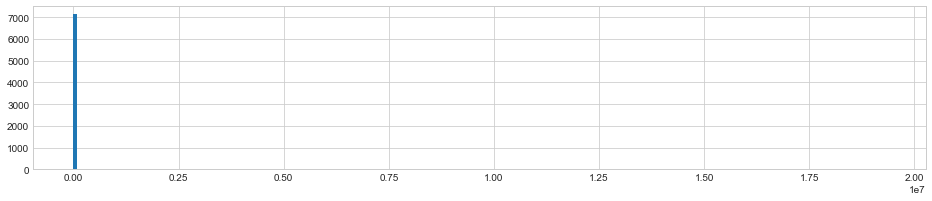

             Volume        change        plevel        spread
count  7.152000e+03  7.152000e+03  7.152000e+03  7.152000e+03
mean   8.404694e+05  1.878312e+03  3.505127e+04  2.728917e+03
std    3.052764e+06  1.572134e+05  2.946816e+06  2.282420e+05
min    0.000000e+00  0.000000e+00  4.605793e-03  0.000000e+00
25%    4.654831e+04  1.460476e-01  1.691501e+00  1.599218e-01
50%    1.946096e+05  3.003621e-01  3.922157e+00  3.152016e-01
75%    6.682784e+05  5.637626e-01  9.900471e+00  5.858701e-01
max    1.027980e+08  1.329513e+07  2.492087e+08  1.930166e+07


C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


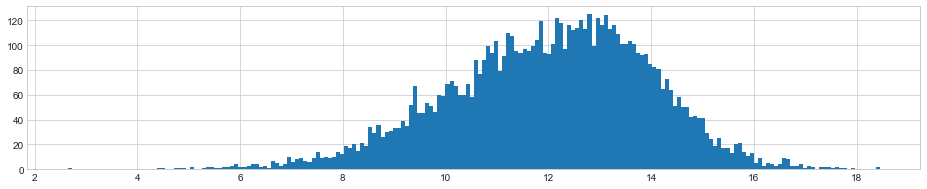

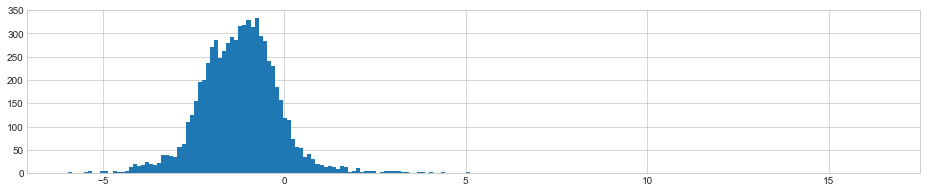

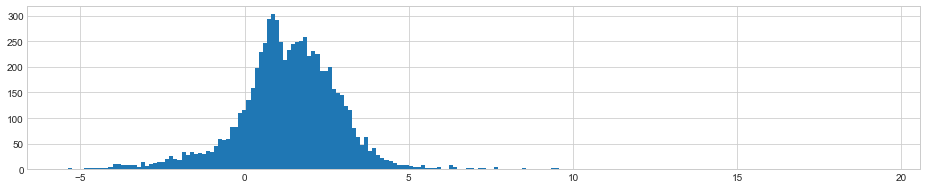

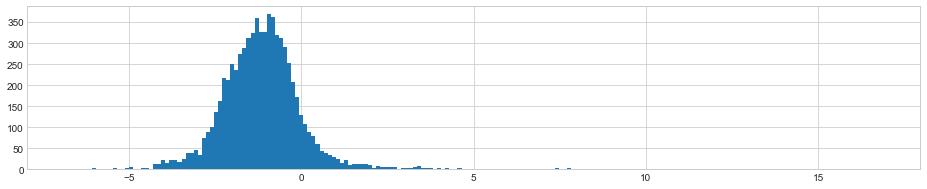

            Volume       change       plevel       spread
count  7145.000000  7145.000000  7145.000000  7145.000000
mean     12.016891    -1.206198     1.335313    -1.134863
std       1.966567     1.202688     1.604708     1.223230
min       2.649159    -5.962448    -5.380440    -6.763914
25%      10.751590    -1.923459     0.528391    -1.831252
50%      12.181373    -1.202253     1.368080    -1.152819
75%      13.412959    -0.572245     2.293843    -0.534448
max      18.448276    16.402908    19.333801    16.775702
(7145, 4)
cluster_norm               Volume    change    plevel    spread
ticker                                            
a.us.      14.795988 -0.070282  2.559878  0.121672
aa.us.     15.464824 -0.372765  3.162741 -0.104374
aaap.us.   13.201435  0.066677  2.438054  0.163508
aaba.us.   16.873159 -0.087298  2.846796  0.223062
aac.us.    12.868231 -0.078100  2.295183  0.064992
aal.us.    15.757388 -0.238980  1.842545 -0.571566
aamc.us.   10.088598  2.891520  5.770377  3.173

In [5]:
# normalize the columns
y_columns=['Volume','change','plevel','spread']

cluster_norm = cluster_std.ix[:,y_columns]

for col in y_columns:
    cluster_norm=cluster_norm[cluster_norm[col]!=-np.inf]
    cluster_norm=cluster_norm[cluster_norm[col]!=np.inf]
    cluster_norm=cluster_norm.dropna()

for col in y_columns:
    plt.figure(figsize=(16,3))
    plt.hist(cluster_norm[col],bins=200)
    plt.show()    

print(cluster_norm.describe())
    
for col in y_columns:
    cluster_norm[col] = np.log(cluster_norm[col])
    cluster_norm=cluster_norm[cluster_norm[col]!=-np.inf]
    cluster_norm=cluster_norm[cluster_norm[col]!=np.inf]
    cluster_norm=cluster_norm.dropna()
#     cluster_norm[col] = StandardScaler().fit_transform(cluster_norm[col].values.reshape(-1, 1))

for col in y_columns:
    plt.figure(figsize=(16,3))
    plt.hist(cluster_norm[col],bins=200)
    plt.show()        

print(cluster_norm.describe())
print(cluster_norm.shape)
print('cluster_norm',cluster_norm)

In [6]:
#Model training

k = 4
kmeans = KMeans(n_clusters=k).fit(cluster_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))

cluster_results = cluster_norm.copy()
cluster_norm['cluster'] = kmeans.labels_
cluster_results['cluster'] = kmeans.labels_

{0, 1, 2, 3}
Counter({3: 3229, 1: 2568, 0: 785, 2: 563})


[(-4.951743776267907, 3), (-3.981485590330959, 1), (-2.7867802631721803, 1), (-1.5979429949904, 1), (-1.9641809545429505, 1)]
[(-2.1476117754089477, 1), (-2.3786583455000554, 1), (-0.6604116901095344, 1), (-1.4091281274665381, 1), (-1.7146605993334563, 1)]
[(3.1734065835954777, 1), (0.38592844272022625, 1), (5.195677871529701, 1), (0.2902467690918679, 1), (5.317205433973264, 1)]
[(0.12167161577306963, 1), (-0.1043736983399199, 1), (0.16350778388589565, 1), (0.2230618315602809, 1), (0.06499199692694965, 1)]
Volume


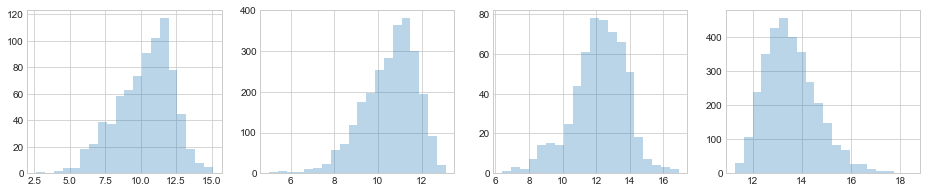

change


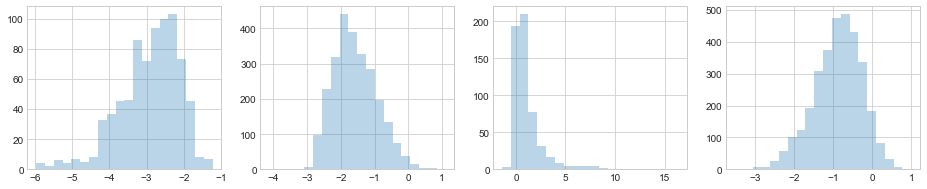

plevel


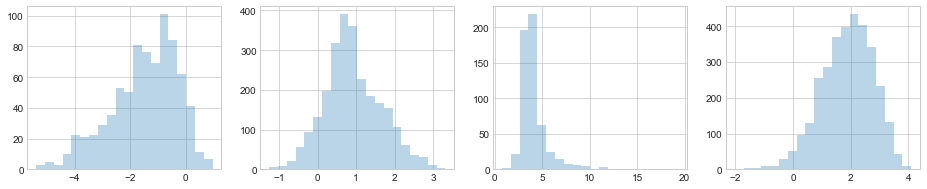

spread


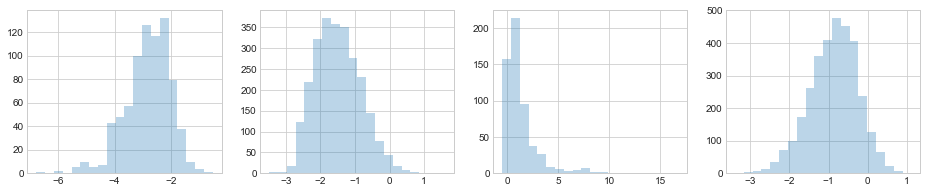

In [7]:
# Analyze the results
cluster_results = cluster_results.reset_index()
for cluster in sorted(set(kmeans.labels_)):
    print(collections.Counter(cluster_results[cluster_results['cluster']==cluster]['spread']).most_common(5))
    
n_clusters = len(set(kmeans.labels_))
for col in y_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
#         plt.xlim([0,cluster_results[col].max()])
        plt.hist(cluster_results[cluster_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()

In [8]:
# Analyze the centroids
cluster_results.groupby('cluster').mean().round(2).T

cluster,0,1,2,3
Volume,10.31,10.55,12.18,13.57
change,-2.92,-1.58,1.11,-0.89
plevel,-1.50,0.92,4.07,1.88
spread,-2.82,-1.49,1.30,-0.87


Volume


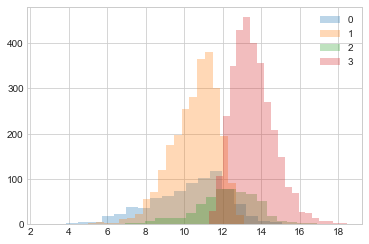

change


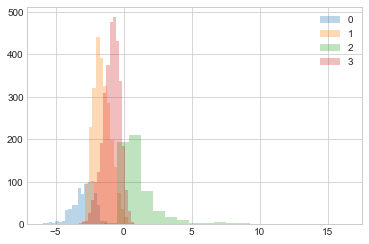

plevel


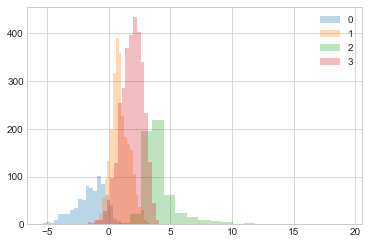

spread


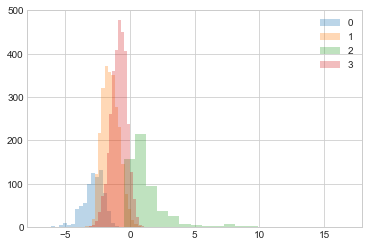

In [9]:
# Analyze the results
for col in y_columns:
    print(col)
    for cluster in set(kmeans.labels_):
        plt.hist(cluster_results[cluster_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
#         plt.xlim([-5,6])
#         plt.ylim([0,2])
    plt.legend()
    plt.show()

In [10]:
# Inter-Cluster
centroids = []
for cluster in sorted(set(kmeans.labels_)):
    centroids.append(cluster_norm[cluster_norm['cluster']==cluster][y_columns].mean().values)
distances = []
for c1 in centroids:
    for c2 in centroids:
        distances.append(euclidean_distances(c1.reshape(-1, 1), c2.reshape(-1, 1))[0][0])
print('Inter Cluster distance', np.mean(distances))

# Intra-Cluster
distances = []
for cluster in sorted(set(kmeans.labels_)):
    cluster_filter = cluster_norm[cluster_norm['cluster']==cluster]
    centroid = cluster_filter[y_columns].mean().values
    for k, v in cluster_filter[y_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(-1, 1), v.values.reshape(-1, 1))[0][0])
print('Intra Cluster distance', np.mean(distances))

# Inertia
distances = []
for cluster in sorted(set(kmeans.labels_)):
    cluster_filter = cluster_norm[cluster_norm['cluster']==cluster]
    centroid = cluster_filter[y_columns].mean().values
    for k, v in cluster_filter[y_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
print('Inertia', np.sum(distances))

Inter Cluster distance 1.4256018853476509
Intra Cluster distance 1.009585721946302
Inertia 27429.013539611748


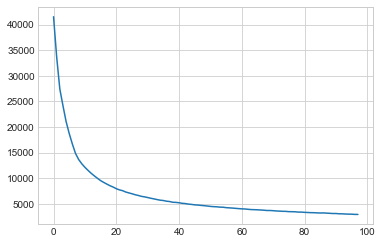

In [11]:
inertia = []
for k in range(2, 100):
    kmeans = KMeans(n_clusters=k).fit(cluster_norm.values)
    inertia.append(kmeans.inertia_)

plt.plot(inertia)
plt.show()

In [12]:
#create dataframe with inertia

# g=range(2,len(inertia)+2)
# print(g)
cluster_inertia=pd.DataFrame({'k':range(2,len(inertia)+2),'inertia':inertia})

print(cluster_inertia)

         inertia   k
0   41522.762216   2
1   33637.135152   3
2   27429.013540   4
3   24172.815115   5
4   21077.112238   6
5   18724.810893   7
6   16680.451952   8
7   14849.077603   9
8   13665.263131  10
9   12828.943456  11
10  12135.693647  12
11  11539.263213  13
12  10969.019206  14
13  10465.907802  15
14   9993.807458  16
15   9543.063570  17
16   9189.201049  18
17   8858.854153  19
18   8544.775943  20
19   8283.578462  21
20   7965.735224  22
21   7736.320404  23
22   7579.973600  24
23   7319.930367  25
24   7142.774453  26
25   6980.110553  27
26   6789.969392  28
27   6646.743659  29
28   6474.196608  30
29   6371.959039  31
..           ...  ..
68   3712.474218  70
69   3712.922057  71
70   3672.352423  72
71   3618.910855  73
72   3588.877235  74
73   3554.999848  75
74   3542.157261  76
75   3486.336663  77
76   3477.929898  78
77   3462.022708  79
78   3398.656875  80
79   3396.182741  81
80   3350.682334  82
81   3323.327141  83
82   3289.514421  84
83   3280.598

In [13]:
#find the greatest change in inertia

cluster_inertia['lag1inr']=cluster_inertia['inertia'].shift(+1)
cluster_inertia['chgint']=cluster_inertia['inertia']-cluster_inertia['lag1inr']
cluster_inertia['chgdbl']=cluster_inertia['chgint']-cluster_inertia['chgint'].shift(+1)

print(cluster_inertia)

         inertia   k       lag1inr       chgint       chgdbl
0   41522.762216   2           NaN          NaN          NaN
1   33637.135152   3  41522.762216 -7885.627064          NaN
2   27429.013540   4  33637.135152 -6208.121612  1677.505452
3   24172.815115   5  27429.013540 -3256.198425  2951.923187
4   21077.112238   6  24172.815115 -3095.702876   160.495548
5   18724.810893   7  21077.112238 -2352.301346   743.401531
6   16680.451952   8  18724.810893 -2044.358940   307.942405
7   14849.077603   9  16680.451952 -1831.374350   212.984590
8   13665.263131  10  14849.077603 -1183.814472   647.559878
9   12828.943456  11  13665.263131  -836.319674   347.494798
10  12135.693647  12  12828.943456  -693.249809   143.069865
11  11539.263213  13  12135.693647  -596.430434    96.819374
12  10969.019206  14  11539.263213  -570.244007    26.186427
13  10465.907802  15  10969.019206  -503.111404    67.132604
14   9993.807458  16  10465.907802  -472.100344    31.011059
15   9543.063570  17   9

[90941.8047092   3005.86139656]


<function matplotlib.pyplot.show>

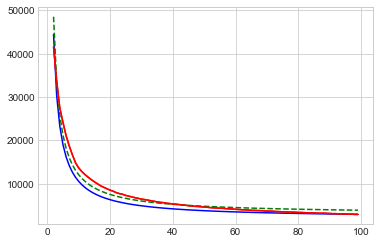

In [14]:
#model inertia
from scipy.optimize import curve_fit

def func(x,b,k):
    return (b/x)+k

x=cluster_inertia['k']
y=func(x,84545.15,2116.11)

plt.plot(x,y,'b-',label='data')
plt.plot(cluster_inertia['k'],cluster_inertia['inertia'],'r-')
plt.show

#optimize the model

popt,pcov=curve_fit(func,cluster_inertia['k'],cluster_inertia['inertia'])
print(popt)

y_new=func(x,popt[0],popt[1])

plt.plot(x,y_new,'g--',label='data')
plt.plot(cluster_inertia['k'],cluster_inertia['inertia'],'r-')
plt.show

In [15]:
#Model training using optimal k

k = 15
kmeans = KMeans(n_clusters=k).fit(cluster_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))

cluster_results = cluster_norm.copy()
cluster_norm['cluster'] = kmeans.labels_
cluster_results['cluster'] = kmeans.labels_

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
Counter({4: 996, 3: 979, 0: 972, 14: 742, 1: 668, 2: 652, 6: 473, 8: 362, 9: 331, 5: 306, 12: 213, 11: 200, 10: 149, 7: 85, 13: 17})


[(-0.894342240772249, 1), (-1.176822154321026, 1), (-1.2698421557346093, 1), (-1.067320057192277, 1), (0.4006085423308308, 1)]
[(-2.1476117754089477, 1), (-1.2711668905618798, 1), (-1.4811586692964256, 1), (-1.5619828854713504, 1), (-1.5909665724012492, 1)]
[(-0.6604116901095344, 1), (-0.6595923755579735, 1), (-0.5807610922999321, 1), (-0.8977394934951526, 1), (-1.048395619918502, 1)]
[(-2.3786583455000554, 1), (-1.4091281274665381, 1), (-1.7146605993334563, 1), (-1.290971472192911, 1), (-1.7903832347898923, 1)]
[(0.16350778388589565, 1), (0.06499199692694965, 1), (-0.006003855369247878, 1), (-0.61404857174128, 1), (-0.44007808862448716, 1)]
[(0.3476307332822076, 1), (0.38592844272022625, 1), (0.2902467690918679, 1), (0.9341420449435143, 1), (1.3872303494402252, 1)]
[(-1.7521047695967986, 1), (-2.830560663423063, 1), (-1.6478791387779397, 1), (-1.1911344747351855, 1), (-2.1109270763074406, 1)]
[(3.1734065835954777, 1), (5.195677871529701, 1), (5.317205433973264, 1), (2.9105475268839105

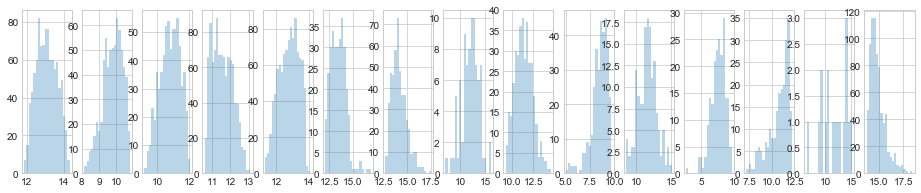

change


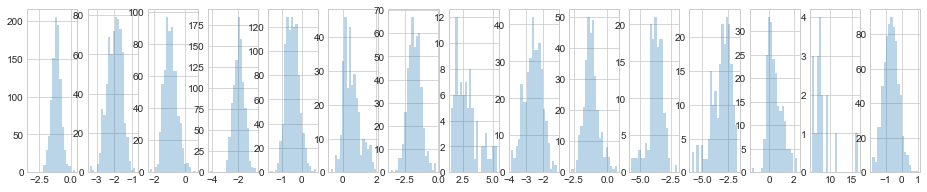

plevel


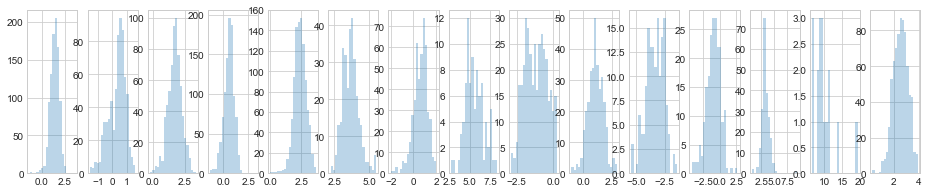

spread


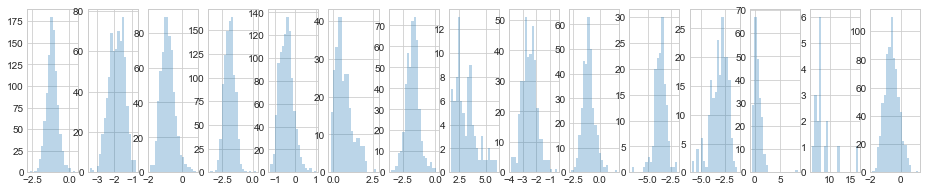

In [16]:
# Analyze the results
cluster_results = cluster_results.reset_index()
for cluster in sorted(set(kmeans.labels_)):
    print(collections.Counter(cluster_results[cluster_results['cluster']==cluster]['spread']).most_common(5))
    
n_clusters = len(set(kmeans.labels_))
for col in y_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
#         plt.xlim([0,cluster_results[col].max()])
        plt.hist(cluster_results[cluster_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()

In [17]:
# Analyze the centroids
cluster_results.groupby('cluster').mean().round(2).T

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Volume,13.07,9.78,10.80,11.56,12.77,13.45,14.16,11.93,11.39,8.51,11.62,7.57,10.80,11.75,14.86
change,-1.15,-1.98,-0.92,-1.96,-0.46,0.52,-1.76,2.82,-2.59,-1.17,-3.75,-3.15,0.44,8.10,-0.65
plevel,1.40,0.33,1.71,0.59,2.39,3.67,0.62,5.57,-1.21,1.06,-3.31,-0.93,3.33,9.93,2.54
spread,-1.14,-1.87,-0.83,-1.89,-0.45,0.67,-1.73,3.11,-2.50,-1.02,-3.62,-3.07,0.63,8.33,-0.59


Volume


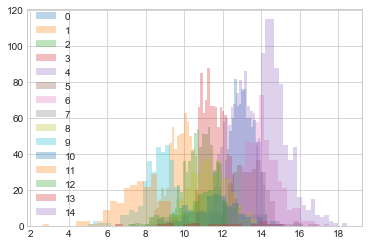

change


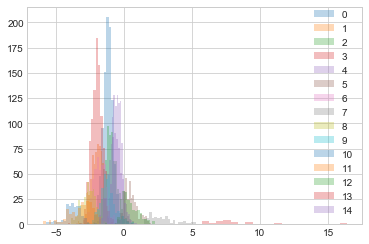

plevel


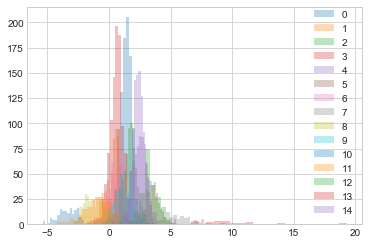

spread


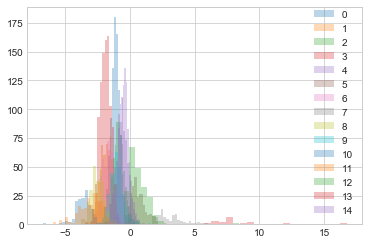

In [18]:
# Analyze the results
for col in y_columns:
    print(col)
    for cluster in set(kmeans.labels_):
        plt.hist(cluster_results[cluster_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)

    plt.legend()
    plt.show()

In [19]:
# Inter-Cluster
centroids = []
for cluster in sorted(set(kmeans.labels_)):
    centroids.append(cluster_norm[cluster_norm['cluster']==cluster][y_columns].mean().values)
distances = []
for c1 in centroids:
    for c2 in centroids:
        distances.append(euclidean_distances(c1.reshape(-1, 1), c2.reshape(-1, 1))[0][0])
print('Inter Cluster distance', np.mean(distances))

# Intra-Cluster
distances = []
for cluster in sorted(set(kmeans.labels_)):
    cluster_filter = cluster_norm[cluster_norm['cluster']==cluster]
    centroid = cluster_filter[y_columns].mean().values
    for k, v in cluster_filter[y_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(-1, 1), v.values.reshape(-1, 1))[0][0])
print('Intra Cluster distance', np.mean(distances))

# Inertia
distances = []
for cluster in sorted(set(kmeans.labels_)):
    cluster_filter = cluster_norm[cluster_norm['cluster']==cluster]
    centroid = cluster_filter[y_columns].mean().values
    for k, v in cluster_filter[y_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
print('Inertia', np.sum(distances))

Inter Cluster distance 2.126079706541436
Intra Cluster distance 0.5887625544511158
Inertia 10295.805712502754
